In [ ]:
 from google.colab import drive
 import os

 drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Datasettt')


In [ ]:
# Dark
import os
folder_path = ('/content/drive/MyDrive/Datasettt/skintone/dark')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#light
import os
folder_path = ('/content/drive/MyDrive/Datasettt/skintone/light')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#mid-dark
import os
folder_path = ('/content/drive/MyDrive/Datasettt/skintone/mid-dark')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#mid-light
import os
folder_path = ('/content/drive/MyDrive/Datasettt/skintone/mid-light')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#cek label
from pathlib import Path
image_dir = Path('/content/drive/MyDrive/Datasettt/skintone')

#uji dir
uji_dir = Path('/content/drive/MyDrive/Datasettt/testing')

In [ ]:
#Get filepaths and labels
filepaths_ = list(image_dir.glob(r'**/*.jpg'))
labels_ = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_))

# Get filepaths and labels uji
filepaths_uji = list(uji_dir.glob(r'**/*.jpg'))
labels_uji = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_uji))
print(labels_uji)

['dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'light', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-dark', 'mid-

In [ ]:
import pandas as pd
filepaths1 = pd.Series(filepaths_, name='Filepath').astype(str)
labels1 = pd.Series(labels_, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths1, labels1], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/Datasettt/skintone/mid-...,mid-light
1,/content/drive/MyDrive/Datasettt/skintone/dark...,dark
2,/content/drive/MyDrive/Datasettt/skintone/mid-...,mid-light
3,/content/drive/MyDrive/Datasettt/skintone/mid-...,mid-dark
4,/content/drive/MyDrive/Datasettt/skintone/dark...,dark


In [ ]:
# uji
filepaths2 = pd.Series(filepaths_uji, name='Filepath').astype(str)
labels2 = pd.Series(labels_uji, name='Label')
# Concatenate filepaths_uji and labels_uji
uji_df = pd.concat([filepaths2, labels2], axis=1)

# Shuffle the DataFrame and reset index
uji_df = uji_df.sample(frac=1).reset_index(drop = True)

# Show the result
uji_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/Datasettt/testing/dark/...,dark
1,/content/drive/MyDrive/Datasettt/testing/dark/...,dark
2,/content/drive/MyDrive/Datasettt/testing/light...,light
3,/content/drive/MyDrive/Datasettt/testing/light...,light
4,/content/drive/MyDrive/Datasettt/testing/mid-d...,mid-dark


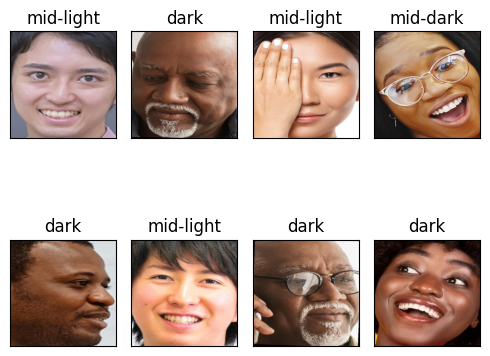

In [ ]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(5, 5),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

<ipython-input-12-d66e96ba66ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


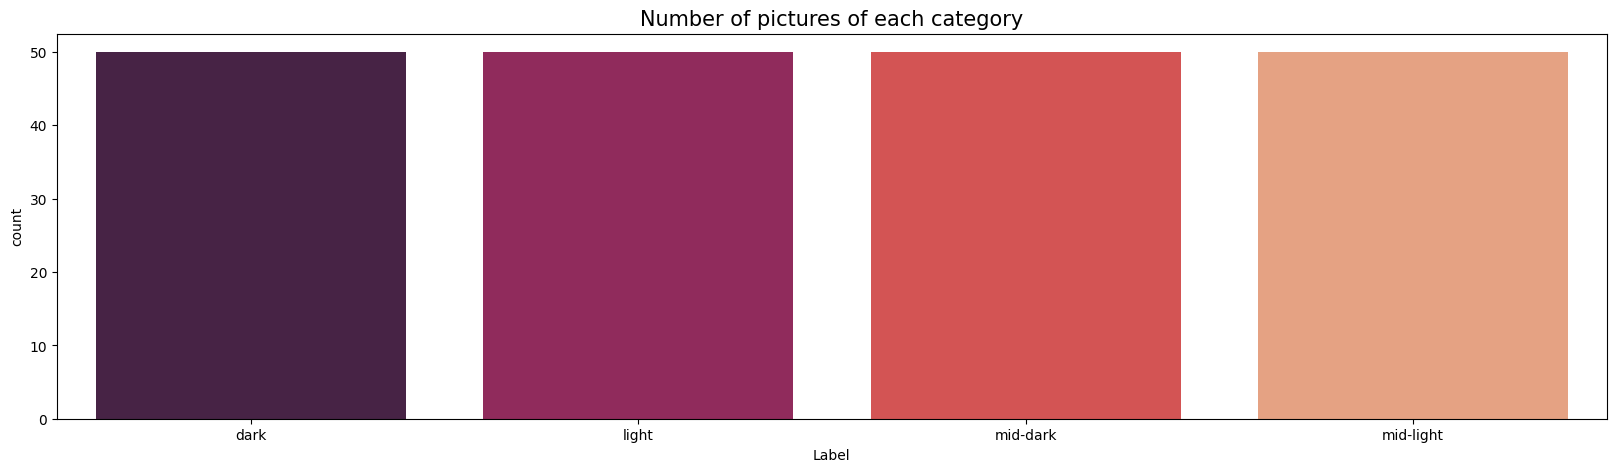

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = uji_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

In [ ]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=batch_size,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',)

validasi_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=batch_size,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 3200 validated image filenames belonging to 4 classes.
Found 800 validated image filenames belonging to 4 classes.


In [ ]:
# Load MobileNetV2 pre-trained on ImageNet data
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,

    input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3, seed=112),
    Dense(512, activation='relu'),
    Dropout(0.5, seed=112),
    Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [ ]:
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/Datasettt/MobileNetV2.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
# Define your callback
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.85:
            print('\nReached 90% accuracy. Stopping training.')
            self.model.stop_training = True

# Instantiate the callback
callbacks = MyCallback()

In [ ]:
# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.n/batch_size,
    epochs=100,
    validation_data=validasi_data,
    validation_steps=validasi_data.n/batch_size,
    verbose=1,
     callbacks=([callbacks],[checkpoint_callback])
     )

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 1.3346 - accuracy: 0.3728
Epoch 1: loss improved from inf to 1.33457, saving model to /content/drive/MyDrive/Datasettt/MobileNetV2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 1212s 12s/step - loss: 1.3346 - accuracy: 0.3728 - val_loss: 1.0590 - val_accuracy: 0.5362
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 1.1312 - accuracy: 0.4609
Epoch 2: loss improved from 1.33457 to 1.13123, saving model to /content/drive/MyDrive/Datasettt/MobileNetV2.h5
100/100 [==============================] - 66s 658ms/step - loss: 1.1312 - accuracy: 0.4609 - val_loss: 0.9667 - val_accuracy: 0.5550
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 1.0149 - accuracy: 0.5312
Epoch 3: loss improved from 1.13123 to 1.01488, saving model to /content/drive/MyDrive/Datasettt/MobileNetV2.h5
100/100 [==============================] - 65s 655ms/step - loss: 1.0149 - accuracy: 0.5312 - val_loss: 0.9032 - val_accuracy: 0.5962
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 0.9744 - accuracy: 0.5578
Epoch 4: loss improved from 1.01488 to 0.97437, saving model to /content/drive/MyDr

In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

<ipython-input-26-d14c9c73262d>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


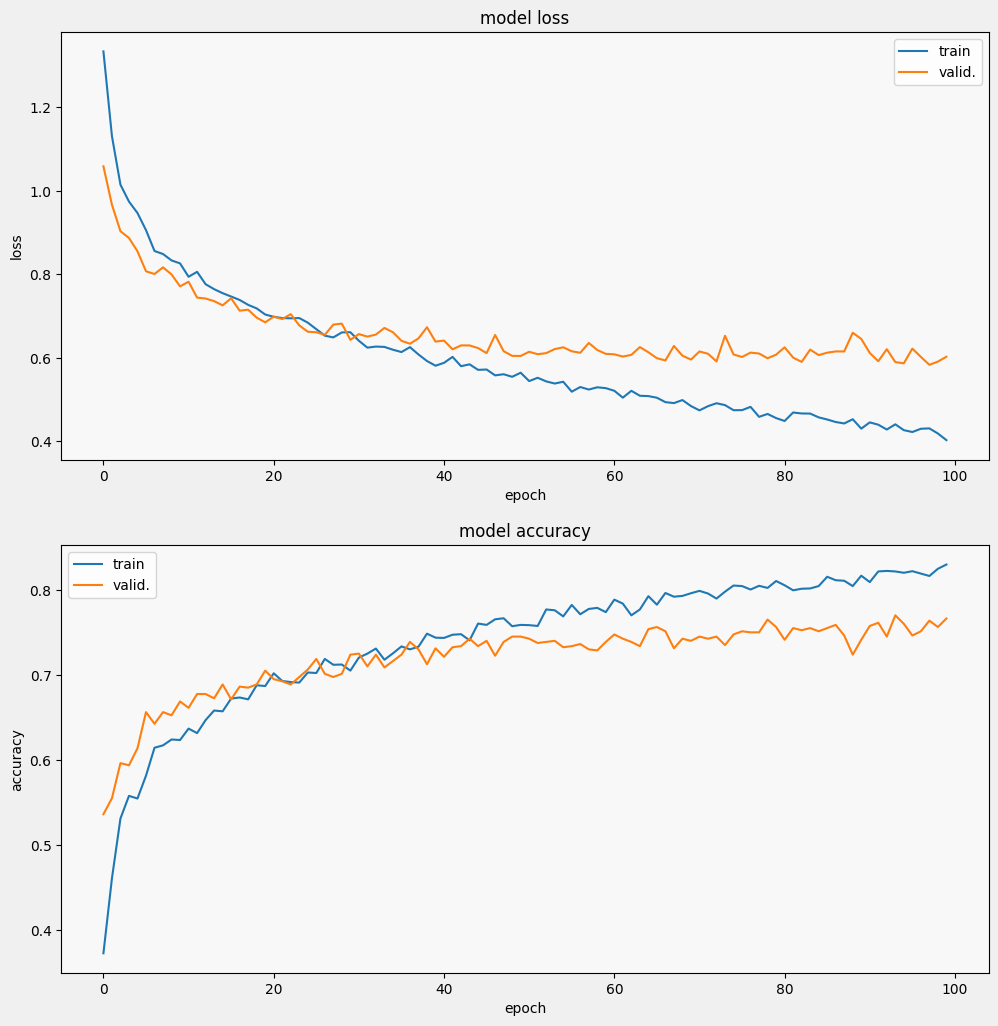

In [ ]:
#display
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss', 211)
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
# Predict the label of the test_images
import numpy as np
pred = model.predict(validasi_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:4]}')

25/25 [==============================] - 6s 203ms/step
The first 5 predictions: ['mid-dark', 'mid-dark', 'dark', 'light']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(validasi_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        dark       0.86      1.00      0.92       201
       light       0.76      0.73      0.75       190
    mid-dark       0.84      0.71      0.77       221
   mid-light       0.59      0.62      0.61       188

    accuracy                           0.77       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.77      0.77      0.76       800



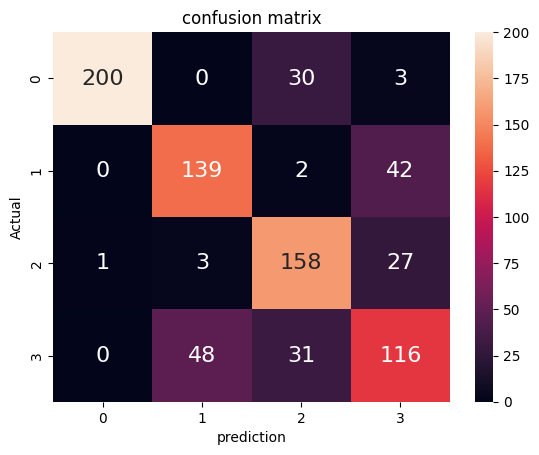

In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

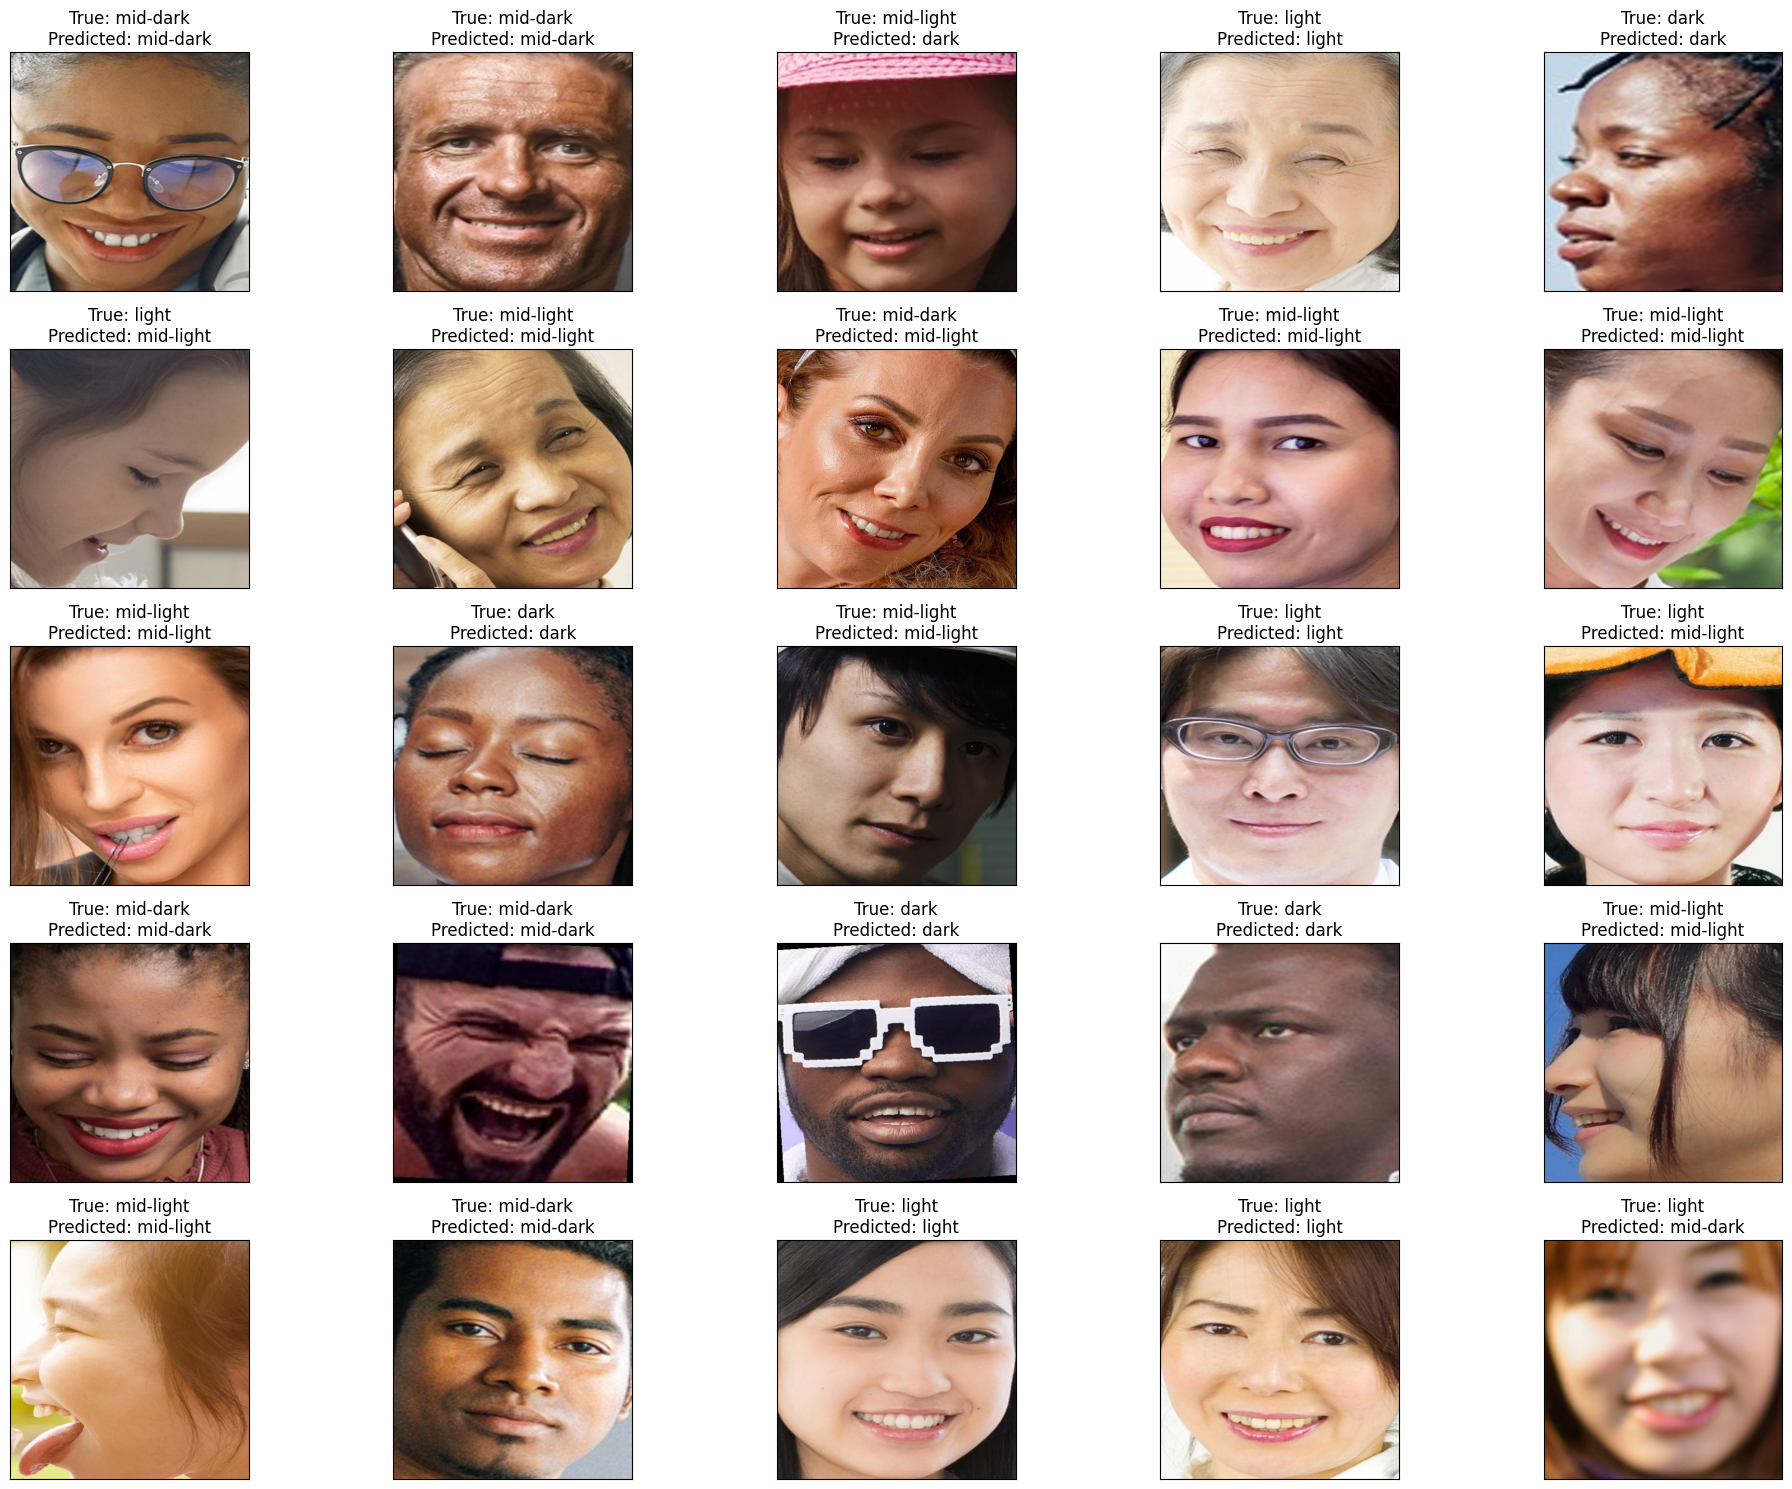

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {validasi_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
import pickle
# Simpan history pelatihan
history_path = '/content/drive/MyDrive/Datasettt/history_mobilenet.pkl'
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

print("Model dan history pelatihan telah disimpan.")

Model dan history pelatihan telah disimpan.


In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive/Datasettt/"
PROJECT_NAME = "H5"
SAVE_MODEL_NAME = "MobileNetV2final.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/Datasettt/H5/MobileNetV2final.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
